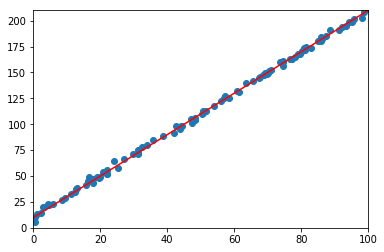

In [13]:
# Génération de données qui suivent une distribution linéaire univariée avec résidus ~ N(0,4)
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def h_lineaire_univarie(theta,x):
    return theta[0]+theta[1]*x
m=100 # nombre de lignes de données
theta_simule = (10,2)
np.random.seed(22) # Pour obtenir des résultats reproductibles avec les données aléatoires

X = np.random.rand(m)*m # m valeurs de x entre 0 et m
Y = h_lineaire_univarie(theta_simule,X)+np.random.randn(m)*2.0 # Résidus N(0,2*2)
#print("X:",X)
#print("Y:",Y)
plt.axis([0,m,0,theta_simule[0]+theta_simule[1]*m])
plt.scatter(X,Y)

X_modele = np.arange(0,m+1,m)
Y_modele = h_lineaire_univarie(theta_simule,X_modele)
plt.plot(X_modele, Y_modele, '-r')

plt.show()

X_bar: 49.71854096049017  Y_bar: 109.78489273929121 CovXY: 1751.0128093933267 VarX: 881.6086553727738
theta0_estime = 11.036086729266145  theta1_estime =  1.9861565545235484
MSE: 3.875502056958768


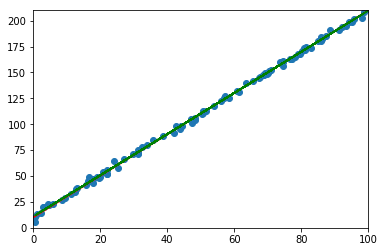

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def h_lineaire_univarie(theta,x):
    return theta[0]+theta[1]*x
def MSE(Y_estime,Y,m):
    return (((Y_estime-Y)**2).sum())*1/m

# Génération de données qui suivent une distribution linéaire univariée avec résidus ~ N(0,4)
m=100 # nombre de lignes de données
theta_simule = (10,2)
np.random.seed(22) # Pour obtenir des résultats reproductibles avec les données aléatoires

X = np.random.rand(m)*m # m valeurs de x entre 0 et m
Y = h_lineaire_univarie(theta_simule,X)+np.random.randn(m)*2.0 # Résidus N(0,2*2)
#print("X:",X)
#print("Y:",Y)
plt.axis([0,m,0,theta_simule[0]+theta_simule[1]*m])
plt.scatter(X,Y)

X_modele = np.arange(0,m+1,m)
Y_modele = h_lineaire_univarie(theta_simule,X_modele)
plt.plot(X_modele, Y_modele, '-r')

X_bar = X.sum()/m
Y_bar = Y.sum()/m
CovXY = (((X-X_bar)*(Y-Y_bar)).sum())/m
VarX = (((X-X_bar)**2).sum())/m
print("X_bar:",X_bar," Y_bar:",Y_bar,"CovXY:",CovXY,"VarX:",VarX)
theta1_estime = CovXY/VarX
theta0_estime = Y_bar-theta1_estime*X_bar
print("theta0_estime =",theta0_estime," theta1_estime = ",theta1_estime)

Y_estime = theta0_estime + theta1_estime*X
plt.plot(X, Y_estime, '-g')

print("MSE:", MSE(Y_estime,Y,m))

plt.show()


MSE: 4.165426771329591
del: -0.6956216366217771 -10.176290128942547
thetatemp[0]: 10.0
theta: (10.006956216366218, 2.1017629012894257)
MSE: 37.92369205955987
del: 9.437296748143904 673.0477367785389
thetatemp[0]: 10.006956216366218
theta: (9.91258324888478, -4.628714466495964)
MSE: 147483.4590076611
del: -660.0104785745987 -44478.21310597457
thetatemp[0]: 9.91258324888478
theta: (16.512688034630767, 440.15341659324974)
MSE: 644087009.6984359
del: 43581.02693417303 2939369.1706291335
thetatemp[0]: 16.512688034630767
theta: (-419.29758130709956, -28953.538289698085)
MSE: 2812923918579.106
del: -2880113.523763041 -194249924.14742294
thetatemp[0]: -419.29758130709956
theta: (28381.83765632331, 1913545.7031845313)
MSE: 1.2284894592680466e+16
del: 190333944.9526273 12837119445.030981
thetatemp[0]: 28381.83765632331
theta: (-1874957.6118699496, -126457648.74712528)
MSE: 5.365187240105859e+19
del: -12578329712.795977 -848348519889.3339
thetatemp[0]: -1874957.6118699496
theta: (123908339.516089

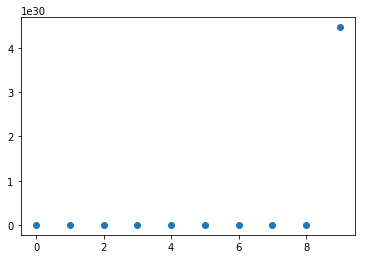

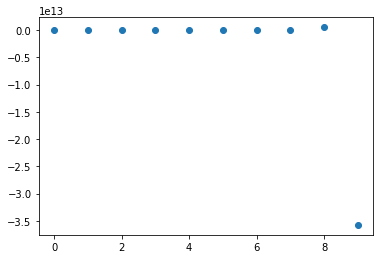

In [17]:
# Minimisation de l'erreur quadratique par descente de gradiant
theta_actuel = (10.0,2.0) # Valeurs initiales pour les paramètres
nb_iterations = 10
vitesse_apprentissage = 0.01
liste_erreurs=[]
liste_theta0=[]
for i in range(nb_iterations) :
    Y_estime = h_lineaire_univarie(theta_actuel,X)
    diffymoinsh =-2*(Y-Y_estime)
    #print("X:",X)
    #print("Y:",Y)
    #print("Y_estime:",Y_estime)
    #print("erreur:",MSE(Y_estime,Y,m))
    MSE_actuel = MSE(Y_estime,Y,m)
    print("MSE:",MSE_actuel)
    liste_erreurs.append(MSE_actuel)
    delta_theta0 = (diffymoinsh.sum())/m
    delta_theta1 = ((diffymoinsh*X).sum())/m
    print("del:",delta_theta0,delta_theta1)
    thetatemp = theta_actuel
    print("thetatemp[0]:",thetatemp[0])
    theta_actuel = (thetatemp[0]-vitesse_apprentissage*delta_theta0,thetatemp[1]-vitesse_apprentissage*delta_theta1)
    liste_theta0.append(theta_actuel[0])
    print("theta:",theta_actuel)
print("thetafinal:",theta_actuel)
plt.scatter(range(nb_iterations),liste_erreurs)
plt.show()
plt.scatter(range(nb_iterations),liste_theta0)
plt.show()